## Notebook to examine whether the first ants to transport are the hastiest.

In [409]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Import data

col_id = '6'
treatment_id = 5
print 'Analyzing colony',col_id,'treatment',treatment_id
path = '/Users/jakehanson/Documents/Ants/Nest_Choice/Improved_Treatments/Separate_Treatments/col' \
        +str(col_id)+'_treatment'+str(treatment_id)+'.csv'
data = pd.DataFrame.from_csv(path,index_col=False)
if data.empty == False:
    print 'Import Success!\n\n'
else:
    print 'ERROR!!! Data Frame is empty for colony',col_id,'treatment',treatment_id    
data = data.sort(['Ant','Time'])  # Sort by ant
n_rows = np.shape(data)[0]
data.index = np.arange(n_rows)  # Reindex accordingly
counter = 0
indices = []
for i in data['Behavior']:
    if i == 'TA':
        indices.append(counter)
    counter = counter + 1


## Get a list of transporter names

transport_indices = data[data['Behavior']=='TA'].index.tolist()
transporters = np.unique(data.loc[transport_indices]['Ant']).tolist()  # List of transporter names

if col_id == '6' and treatment_id == 3:  # This data has a TB at the very beginning of the trial?
    transporters.remove('WOo*1')

    

## For each tranporter, calculate the time spent inside the nest and the time of first transport

time_spent = {}  # dict['Ant'] = [time_in_good, time_in_med, first_transport]

for i in range(np.size(transporters)):
    transporter_data = data[data['Ant'] == transporters[i]]
    first_transport = transporter_data[(transporter_data['Behavior']=='TA') | 
                                      (transporter_data['Behavior']=='TB') |
                                      (transporter_data['Behavior']=='TU')]['Time'].iloc[0]    
    # Convert time to float rather than string
    first_transport = time.strptime(first_transport,'%H:%M:%S')
    first_transport = first_transport.tm_hour*3600+first_transport.tm_min*60+first_transport.tm_sec
    first_transport = first_transport/60.  # convert to minutes


    
    enter_data = transporter_data[(transporter_data['Behavior'] == 'E' ) | 
                                  (transporter_data['Behavior'] == 'TA') |
                                  (transporter_data['Behavior'] == 'TB') |
                                  (transporter_data['Behavior'] == 'TU') |
                                  (transporter_data['Behavior'] == 'BC') ]
    
    leave_data = transporter_data[(transporter_data['Behavior'] == 'L') | 
                                  (transporter_data['Behavior'] == 'TAO') |
                                  (transporter_data['Behavior'] == 'TBO') |
                                  (transporter_data['Behavior'] == 'BCO')]
    
    time_inside_good = 0.
    time_inside_med = 0.
    for j in range(len(leave_data.index)):
        entry_time = time.strptime(enter_data['Time'].iloc[j],'%H:%M:%S')
        entry_time = entry_time.tm_hour*3600+entry_time.tm_min*60+entry_time.tm_sec
     
        leave_time = time.strptime(leave_data['Time'].iloc[j],'%H:%M:%S')
        leave_time = leave_time.tm_hour*3600+leave_time.tm_min*60+leave_time.tm_sec
        
        if (leave_time - entry_time) < 0:
            print 'ERROR! Negative time inside....'
            
        # only count time BEFORE transport
        if (leave_time < (first_transport*60)):
            if enter_data['Location/Origin'][enter_data.index[j]] == 'mediocre':
                time_inside_med = time_inside_med + (leave_time - entry_time)
            elif enter_data['Location/Origin'][enter_data.index[j]] == 'good':
                time_inside_good = time_inside_good + (leave_time - entry_time)
            else:
                print 'ERROR: NEST SITE DOES NOT MATCH MED OR GOOD'
    
    time_inside_good = time_inside_good/60.  # convert to minutes
    time_inside_med = time_inside_med/60.  # convert to minutes
    time_spent[transporters[i]] = [time_inside_good,time_inside_med,first_transport]
    
print time_spent

Analyzing colony 6 treatment 5
Import Success!


{'GO**': [23.666666666666668, 7.683333333333334, 175.55], 'LG**': [19.533333333333335, 0.0, 156.13333333333333], 'WGOW': [27.416666666666668, 0.0, 119.65], 'WOo*1': [67.56666666666666, 0.0, 195.41666666666666], 'P*Y*': [28.6, 0.0, 124.06666666666666], '****': [22.7, 11.033333333333333, 125.38333333333334], '*GYP': [31.15, 0.13333333333333333, 141.21666666666667], 'PPWO': [17.733333333333334, 0.03333333333333333, 148.55], 'WGG*': [19.033333333333335, 4.133333333333334, 179.7], 'wp**': [17.516666666666666, 1.2333333333333334, 140.38333333333333], '**WW': [24.016666666666666, 4.583333333333333, 157.53333333333333], 'WO**1': [8.966666666666667, 0.0, 138.8], 'Gg**': [8.05, 0.0, 166.83333333333334], 'PGGY': [58.15, 3.0833333333333335, 195.33333333333334], 'LO*Y': [4.9, 1.2666666666666666, 105.15], '*W**1': [36.5, 2.1333333333333333, 151.65]}


#### Plot the time spent examining vs the time of first transport

In [410]:
sorted_list = sorted(time_spent.items(), key=lambda x: x[1][2])
print sorted_list

names = []
time_in_med  = []
time_in_good = []
transport_times = []

for i in range(len(sorted_list)):
    names.append(sorted_list[i][0])
    time_in_good.append(sorted_list[i][1][0])
    time_in_med.append(sorted_list[i][1][1])
    transport_times.append(sorted_list[i][1][2])

[('LO*Y', [4.9, 1.2666666666666666, 105.15]), ('WGOW', [27.416666666666668, 0.0, 119.65]), ('P*Y*', [28.6, 0.0, 124.06666666666666]), ('****', [22.7, 11.033333333333333, 125.38333333333334]), ('WO**1', [8.966666666666667, 0.0, 138.8]), ('wp**', [17.516666666666666, 1.2333333333333334, 140.38333333333333]), ('*GYP', [31.15, 0.13333333333333333, 141.21666666666667]), ('PPWO', [17.733333333333334, 0.03333333333333333, 148.55]), ('*W**1', [36.5, 2.1333333333333333, 151.65]), ('LG**', [19.533333333333335, 0.0, 156.13333333333333]), ('**WW', [24.016666666666666, 4.583333333333333, 157.53333333333333]), ('Gg**', [8.05, 0.0, 166.83333333333334]), ('GO**', [23.666666666666668, 7.683333333333334, 175.55]), ('WGG*', [19.033333333333335, 4.133333333333334, 179.7]), ('PGGY', [58.15, 3.0833333333333335, 195.33333333333334]), ('WOo*1', [67.56666666666666, 0.0, 195.41666666666666])]


[('LO*Y', [4.9, 1.2666666666666666, 105.15]), ('WGOW', [27.416666666666668, 0.0, 119.65]), ('P*Y*', [28.6, 0.0, 124.06666666666666]), ('****', [22.7, 11.033333333333333, 125.38333333333334]), ('WO**1', [8.966666666666667, 0.0, 138.8]), ('wp**', [17.516666666666666, 1.2333333333333334, 140.38333333333333]), ('*GYP', [31.15, 0.13333333333333333, 141.21666666666667]), ('PPWO', [17.733333333333334, 0.03333333333333333, 148.55]), ('*W**1', [36.5, 2.1333333333333333, 151.65]), ('LG**', [19.533333333333335, 0.0, 156.13333333333333]), ('**WW', [24.016666666666666, 4.583333333333333, 157.53333333333333]), ('Gg**', [8.05, 0.0, 166.83333333333334]), ('GO**', [23.666666666666668, 7.683333333333334, 175.55]), ('WGG*', [19.033333333333335, 4.133333333333334, 179.7]), ('PGGY', [58.15, 3.0833333333333335, 195.33333333333334]), ('WOo*1', [67.56666666666666, 0.0, 195.41666666666666])]


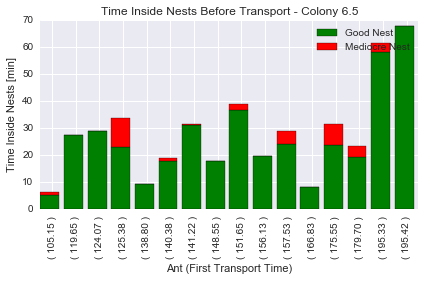

In [411]:
sorted_list = sorted(time_spent.items(), key=lambda x: x[1][2])
print sorted_list

names = []
time_in_med  = []
time_in_good = []
transport_times = []

for i in range(len(sorted_list)):
    names.append(sorted_list[i][0])
    time_in_good.append(sorted_list[i][1][0])
    time_in_med.append(sorted_list[i][1][1])
    transport_times.append(sorted_list[i][1][2])

plt.bar(np.arange(len(time_spent)),time_in_good,color='green',label='Good Nest')
plt.bar(np.arange(len(time_spent)),time_in_med,color='red',bottom=time_in_good,label='Mediocre Nest')
plt.legend()
plt.xticks(np.arange(len(time_spent))+0.5,['( %.2f )'% elem for elem in transport_times]
,size=10,rotation=90)
plt.ylabel('Time Inside Nests [min]')
plt.xlabel('Ant (First Transport Time)')
plt.title('Time Inside Nests Before Transport - Colony '+col_id+'.'+str(treatment_id))
plt.tight_layout()
plt.savefig('/Users/jakehanson/Desktop/hist_time_exam_col'+col_id+'_t'+str(treatment_id)+'.pdf')
plt.show()

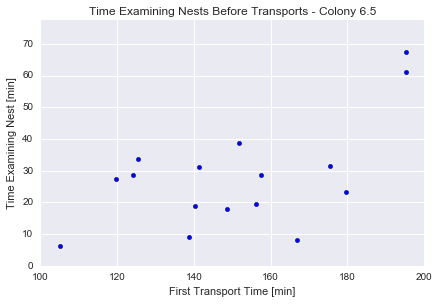

In [412]:
net_time = []
for i in range(np.size(time_in_good)):
    net_time.append(time_in_good[i]+time_in_med[i])

    
plt.scatter(transport_times,net_time)

#plt.scatter(transport_times,time_in_good+time_in_med,color='green')
#plt.scatter(transport_times,time_in_med,color='red')
plt.tight_layout()
plt.ylim((0,np.max(net_time)+10))
plt.xlabel('First Transport Time [min]')
plt.ylabel('Time Examining Nest [min]')
plt.title('Time Examining Nests Before Transports - Colony ' + col_id+'.'+str(treatment_id))
plt.savefig('/Users/jakehanson/Desktop/scatter_time_exam_col'+col_id+'_t'+str(treatment_id)+'.pdf')
plt.show()

## If there is not a good correlation between the time spent inside examining nests and the time of first transport, this supports Pratt et al 2002 and Pratt (Quorum Sensing) 2005.
- An individual ant doesn't care if it has surveyed a nest before recruiting, it "trusts" the experience of her nest mates and senses quorum by direct contact and encounter rate.

## If there is a good correlation between time spent inside and the time of first tranpsort, then the decision to transport is potentially related to the time spent examining the nests.
- Or, there is a hidden variable that is causing this correlation.

## Colony 208 really seems to show this correlation.